In [86]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ,OneHotEncoder 
from sklearn.metrics import f1_score ,accuracy_score ,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

## Ghufran Ahmed Barcha
  ## C2-06

## Question 1

In [92]:
def pattern():
    for i in range(5):
        for j in range(9):
            if j == 0 or j == 8 or (i == j and j > 4) or (i == 4 and j % 2 == 0):
                print("**", end=" ")
            else:
                print(" ", end=" ")
        print()


**        ** 
**        ** 
**   **   ** 
**  ** ** ** 
**        ** 


## Question 2

In [50]:


arr = np.zeros((8, 8))
for a in range(8):
    for b in range(8):
        if (a + b) % 2 == 0:
            arr[a, b] = 1

print(arr)

[[1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]]


 ## Question 3

In [22]:
data = pd.read_csv("../DataSets/heart.csv")
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<Axes: >

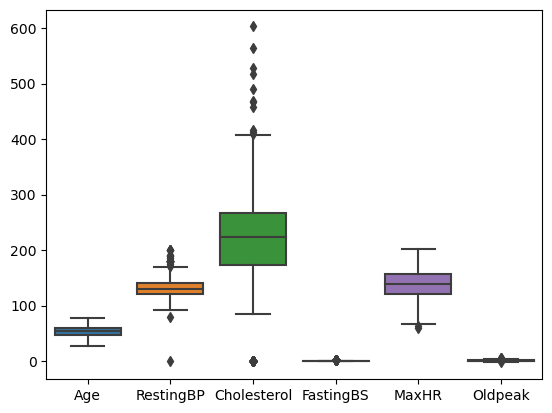

In [20]:
df = data.drop("HeartDisease",axis = 1)

sns.boxplot(data =df )

## As you can see from boxplot there are outlier shown in diamond shape mean there are outliers
##  in RestingBP  Cholesterol FastingBS RestingECG MaxHR which can decrease our model accuracy 




## Question 4

In [29]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [81]:
x = data.drop("HeartDisease",axis=1)
y = data["HeartDisease"]

numeric = ["Age","RestingBP","Cholesterol","MaxHR","Oldpeak"]
categ = ["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"]

transformer = ColumnTransformer([("scaling",StandardScaler() ,numeric),
                                 ("categor",OneHotEncoder(),categ)],remainder="passthrough")

trans_x = transformer.fit_transform(x)

x_train ,x_test ,y_train , y_test = train_test_split(trans_x , y,test_size = 0.3 ,random_state = 42)


In [82]:
## using random Forest Classifier

clf = RandomForestClassifier()
clf.fit(x_train,y_train)

print("Model score",clf.score(x_test ,y_test))


y_preds  = clf.predict(x_test)

print("Accuray",accuracy_score(y_test ,y_preds))
print("f1_score",f1_score(y_test ,y_preds))

Model score 0.8586956521739131
Accuray 0.8586956521739131
f1_score 0.8792569659442725


In [83]:
## Using Decision Tree


dcf = DecisionTreeClassifier()
dcf.fit(x_train,y_train)

print(dcf.score(x_test ,y_test))

y_preds  = dcf.predict(x_test)
print("Accuray",accuracy_score(y_test ,y_preds))
print("f1_score",f1_score(y_test ,y_preds))

0.7572463768115942
Accuray 0.7572463768115942
f1_score 0.780327868852459


In [84]:
## Using LogisticRegression

lg = LogisticRegression()
lg.fit(x_train,y_train)

print(lg.score(x_test ,y_test))

y_preds  = lg.predict(x_test)
print("Accuray",accuracy_score(y_test ,y_preds))
print("f1_score",f1_score(y_test ,y_preds))

0.8804347826086957
Accuray 0.8804347826086957
f1_score 0.897196261682243


In [85]:
## Using SVC

svc = SVC()
svc.fit(x_train,y_train)

print(svc.score(x_test ,y_test))

y_preds  = svc.predict(x_test)
print("Accuray",accuracy_score(y_test ,y_preds))
print("f1_score",f1_score(y_test ,y_preds))

0.8876811594202898
Accuray 0.8876811594202898
f1_score 0.9063444108761329


In [87]:
## Using KNN

knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

print(knn.score(x_test ,y_test))

y_preds  = knn.predict(x_test)
print("Accuray",accuracy_score(y_test ,y_preds))
print("f1_score",f1_score(y_test ,y_preds))

0.8913043478260869
Accuray 0.8913043478260869
f1_score 0.9085365853658537


## Question 5 
  ### Problem :
    I have to train a model which will predict HeartDisease based on the different condition of patient 
     
  ### Importing Data  
     First I have import the data from my computer which is in csv(Comma seperated values) into my jupiter file 
     and converted it into DataFrame so i can easily manipulate it in pandas.
     
   ### Data Cleaning
     I first check the data and checked if there are any missing data or duplicates values in it 
      so i can remove it before preprocessing.
      
   ### Data Visualization 
        After cleaning the data we I visualize the data in a boxplot to see if there are any outliears in it.
        
   ### Data Preprocessing
        After visualizing the data i used OneHotEncoder and standardScaler to encode the categorical colums and to scale 
        the numerical colums so our model can better understand our data.
        
   ### Model Selection     
        so I are selecting my model  based on measuring multiple test models accuracy_score ,model_score and f1_score 
        and by doing trail and error have selected RandomForestClassifier as my model because it gives me best performance.

